# CHAPTER 4
**Introduction to Neural Networks Using PyTorch**

In [1]:
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

## Recipe 4-1. Working with Activation Functions

Linear Function
$$
y=\alpha x +\beta
$$
Bilinear Function
$$
y = x_1Ax_2+b
$$
Sigmoid Function
$$
\sigma(x)=\frac{1}{1+e^{-\beta x}}
$$
Hyperbolic Tangent Function
$$
tanh(x)=\frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}
$$
Log Sigmoid Transfer Function
$$
f(x)=\log(\frac{1}{1+e^{-\beta x}})
$$
ReLU Function
$$
f(x)=\max(0,x)
$$
Leaky ReLU
$$
f(x)=\max(0,x)+\gamma\min(0,x)
$$

In [2]:
x = Variable(torch.randn(100, 10))
y = Variable(torch.randn(100, 30))

In [3]:
linear = nn.Linear(
    in_features=10,
    out_features=5,
    bias=True
)
out = linear(x)
print("Output size =", out.size())
print("Weight size =", linear.weight.size())

bilinear = nn.Bilinear(
    in1_features=10,
    in2_features=30,
    out_features=5,
    bias=True
)
out = bilinear(x, y)
print("Output size =", out.size())
print("Weight size =", bilinear.weight.size())

Output size = torch.Size([100, 5])
Weight size = torch.Size([5, 10])
Output size = torch.Size([100, 5])
Weight size = torch.Size([5, 10, 30])


In [4]:
sigmoid = nn.Sigmoid()
out = sigmoid(x)
print("Output size =", out.size())

tanh = nn.Tanh()
out = tanh(x)
print("Output size =", out.size())

logsigmoid = nn.LogSigmoid()
out = logsigmoid(x)
print("Output size =", out.size())

Output size = torch.Size([100, 10])
Output size = torch.Size([100, 10])
Output size = torch.Size([100, 10])


In [5]:
relu = nn.ReLU()
out = relu(x)
print("Output size =", out.size())

leakyrelu = nn.LeakyReLU()
out = leakyrelu(x)
print("Output size =", out.size())

Output size = torch.Size([100, 10])
Output size = torch.Size([100, 10])


## Recipe 4-2. Visualizing the Shape of Activation Functions

In [6]:
x = Variable(torch.linspace(-10, 10, 100))
y_relu = nn.functional.relu(x)
y_sigmoid = torch.sigmoid(x)
y_tanh = torch.tanh(x)
y_logsigmoid = nn.functional.logsigmoid(x)
y_softplus = nn.functional.softplus(x)

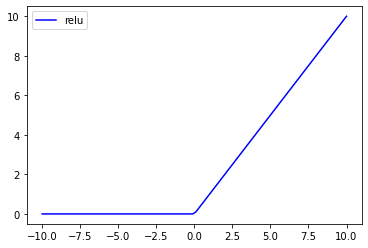

In [7]:
plt.figure()
plt.plot(x, y_relu, 'b-', label='relu')
plt.legend()

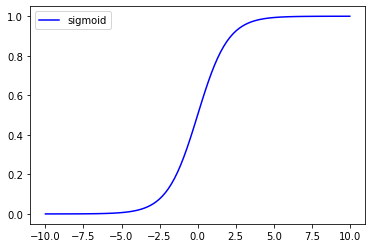

In [8]:
plt.figure()
plt.plot(x, y_sigmoid, 'b-', label='sigmoid')
plt.legend()

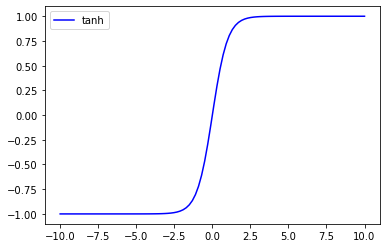

In [9]:
plt.figure()
plt.plot(x, y_tanh, 'b-', label='tanh')
plt.legend()

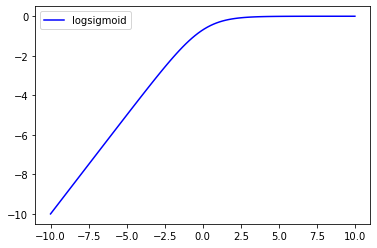

In [10]:
plt.figure()
plt.plot(x, y_logsigmoid, 'b-', label='logsigmoid')
plt.legend()

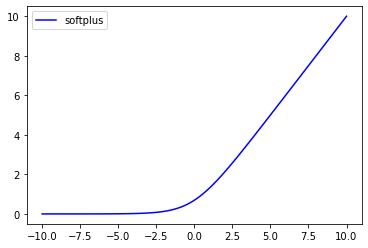

In [11]:
plt.figure()
plt.plot(x, y_softplus, 'b-', label='softplus')
plt.legend()

## Recipe 4-3. Basic Neural Network Model

In [12]:
train_x = np.asarray([13.3, 14.4, 15.5, 16.71, 16.93, 14.168, 19.779,
                      16.182, 17.59, 12.167, 17.042, 10.791, 15.313,
                      17.997, 15.654, 19.27, 13.1])
train_y = np.asarray([11.7, 12.76, 12.09, 13.19, 11.694, 11.573,
                      13.366, 12.596, 12.53, 11.221, 12.827, 13.465,
                      11.65, 12.904, 12.42, 12.94, 11.3])
x = Variable(torch.from_numpy(train_x).type(torch.FloatTensor),
             requires_grad=False).view(17, 1)
y = Variable(torch.from_numpy(train_x).type(torch.FloatTensor),
             requires_grad=False).view(17, 1)

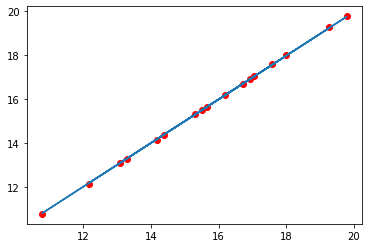

In [13]:
f = nn.Linear(1, 1)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(f.parameters(), lr=0.01)

for epoch in range(5000):
    y_pred = f(x)
    loss = loss_fn(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

plt.figure()
plt.scatter(x, y, c='r')
plt.plot(x, y_pred.detach().numpy())
plt.show()

## Recipe 4-4. Tensor Differentiation

`pass`